In [2]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pickle
from tqdm import trange

In [3]:
from matplotlib.image import imread
import os
import numpy as np
from random import randrange
import cv2 

<img src="afhq/train/cat/flickr_cat_000043.jpg" />

(512, 64, 64, 3)


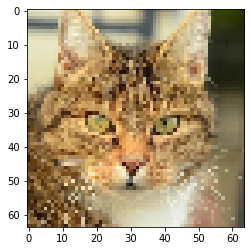

In [15]:
N = 512
i = 0
cat_photos = []
directory = "afhq/train/cat"
with os.scandir(directory) as entries:
    for entry in entries:
        if i>=N:
            break
        if entry.is_file():
            #print(entry.name)
            name = directory + "/" + entry.name
            cat_photos.append(cv2.resize(imread(name), (64, 64)))
        i += 1

cat_photos_np = np.array(cat_photos)
print(cat_photos_np.shape)
plt.imshow(cat_photos_np[randrange(N)])

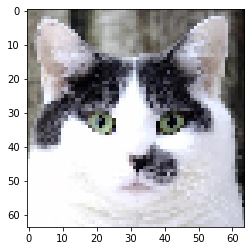

In [16]:
plt.imshow(cat_photos_np[randrange(N)])

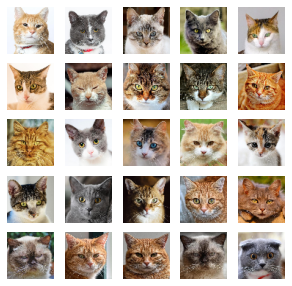

In [17]:
n_rows, n_cols, i = 5, 5, 1
plt.figure(figsize=(n_cols, n_rows))
for im in cat_photos_np[:n_rows*n_cols]:#.movedim(1, 3):
    plt.subplot(n_rows, n_cols, i)
    plt.imshow(im)
    #plt.title(i-1)
    plt.axis('off')
    i += 1

In [18]:
filename="cats_"+str(N)+".npy"
np.save(filename, cat_photos_np)